# Brazil Biomass tiles

January 2018


`https://storage.googleapis.com/wri-public/mapbiomass/tiles/v4/<YYYY>/<Z>/<X>/<Y>.png`


```

17 bands, one for each year (2000 to 2016)
Ideally, we want to create tiles for each year. Users can select them in a menu, but not animate over time
We will not do any analysis on the data at this point, only visualization
Here are the classes we want:
Natural forest – values 3, 4, and 5, color #16633D
Planted forest – value 9, color #DB84D7
Non-forest wetlands – value 11, color #29D2AB
Grassland – value 12, color #C3ED61
Other non-forest vegetation – value 13, #6EA224
Pasture – value 15, color #CD7D28
Agriculture – value 18, color #FBF0AB
Pasture or Agriculture – value 21, color #F4D634
Non-vegetated areas – values 22, 23, 24, and 25, color #D1D3D3
Water bodies – value 26, color #2784BC
Unobserved – value 27. Would prefer to leave this "blank" in the tiles, but if needed, color #5C6060
I don't think there are pixels with values 1, 2, 10, or 14, but let me know if that's not true and I'll let you know which class they belong to
I made these colors up, so if possible would be great to do one year and then see how it looks before we do the rest. Would that work?
 ```

In [16]:
import requests
import math
import maya
import numpy as np
import imageio
import matplotlib.pyplot as plt
import folium
%matplotlib inline

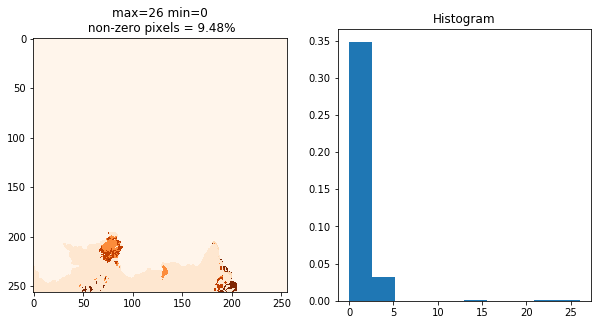

In [34]:
tile_url='https://storage.googleapis.com/wri-public/mapbiomass/tiles/v4/2007/4/5/7.png'
im_arrays = imageio.imread(tile_url)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=False)
f.set_size_inches(10,5)
ax1.set_title((f"max={im_arrays.max()} min={im_arrays.min()}"
               f"\n non-zero pixels = {len(im_arrays.flatten()[(im_arrays.flatten() > 0)]) / len(im_arrays.flatten()) * 100.:3.2f}%")
             )
ax1.imshow(im_arrays, cmap='Oranges')
ax2.set_title(f'Histogram')
ax2.hist(im_arrays.flatten(), normed=True)
#ax2.set_yscale('log', nonposy='clip')
plt.show()


In [17]:
basemap = "Mapbox Bright"

map = folium.Map(location=[28.29, -16.6], zoom_start=3, tiles=basemap)
tileset=r"https://storage.googleapis.com/wri-public/mapbiomass/tiles/v4/2000/{z}/{x}/{y}.png"
map.add_tile_layer(tiles=tileset, max_zoom=12,min_zoom=1,  attr='Custom tiles')
map

In [36]:
folium.TileLayer?